Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS300.N11

FINAL PROJECT - 18/11/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eK3n3PGZi29nLARx41dhts7JveC8Zf6T?usp=sharing)

# **FINAL PROJECT - BOOKING RECOMMENDATION SYSTEM**

## **Import libraries**

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time
import datetime
import random
import nltk
nltk.download('stopwords')
nltk.download('punkt')


from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
from numpy import dot
from numpy import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phuongthanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phuongthanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
PATH ='/Users/phuongthanh/Project/DS300.N11-Recommendation-System-main/Final_Project/data/'
LOCATION = ['Đà Lạt', 'Hà Nội', 'TP. Hồ Chí Minh', 'Vũng Tàu', 'Đà Nẵng', 'Phú Quốc', 'Hội An', 'Nha Trang', 'Sa Pa', 'Huế']

## **Read dataset**

In [4]:
ratings = pd.read_csv('hotels_users_ratings.csv')
ratings

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1284,Tran,5
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
...,...,...,...,...,...,...,...,...,...
38796,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
38797,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
38798,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
38799,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


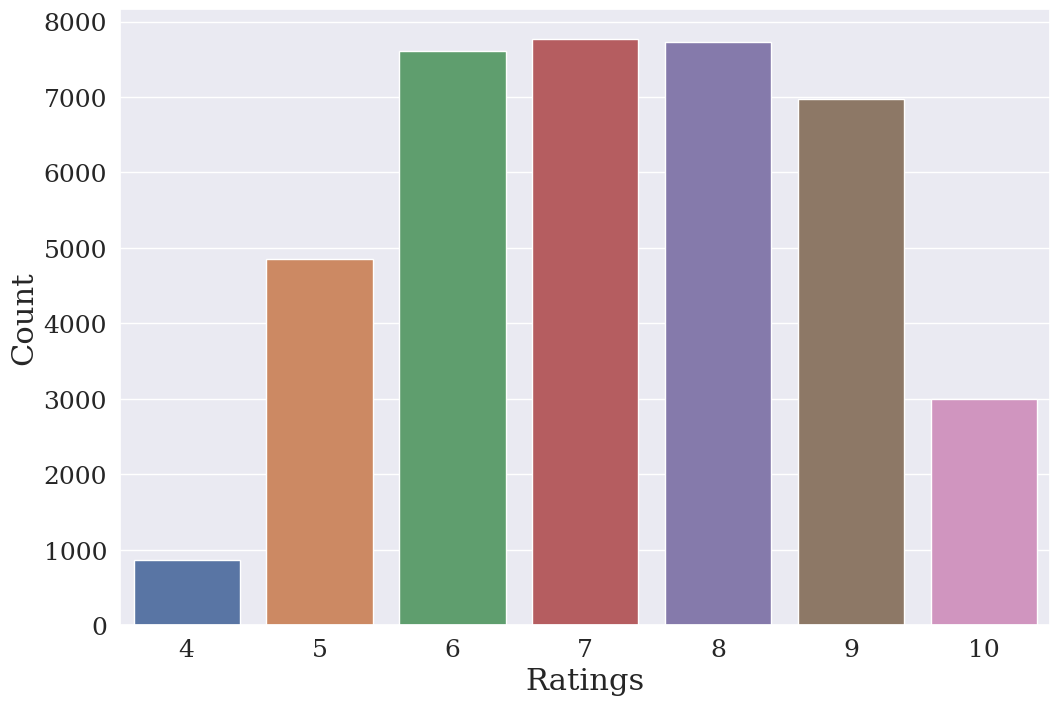

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x=ratings["Rating"])

plt.xlabel('Ratings', fontsize=22, fontfamily='serif')
plt.ylabel('Count', fontsize=22, fontfamily='serif')

plt.xticks(fontsize=18, fontfamily='serif')
plt.yticks(fontsize=18, fontfamily='serif')

plt.show()

In [6]:
ratings_user = pd.read_csv(PATH + 'train_total_by_user_38k1.csv')
ratings_user

,URL Hotel,Location,User,HotelID,Name Hotel,Descriptions,Rating,Address,UserID
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Thảo,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5865
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tran,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",5,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5978
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tho,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5002
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tuan,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",9,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1607
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Phan,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",7,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",2035
...,...,...,...,...,...,...,...,...,...
38796,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Linh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,6,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6412
38797,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Anh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,9,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1557
38798,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Phong,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,7,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",4129
38799,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Hạnh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,6,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",3191


In [7]:
ratings_item = pd.read_csv(PATH+'train_total_by_item_32k3.csv')
ratings_item

,URL Hotel,Location,User,HotelID,Name Hotel,Descriptions,Rating,Address,UserID
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Thảo,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5865
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tran,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",5,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5978
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tho,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5002
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tuan,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",9,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1607
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Phan,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",7,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",2035
...,...,...,...,...,...,...,...,...,...
38796,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Linh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,6,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6412
38797,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Anh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,9,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1557
38798,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Phong,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,7,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",4129
38799,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Hạnh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,6,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",3191


In [8]:
ratings_cb = pd.read_csv(PATH + 'train_total_cb_34k9.csv')
ratings_cb

,URL Hotel,Location,User,HotelID,Name Hotel,Descriptions,Rating,Address,UserID
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Thảo,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5865
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tran,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",5,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5978
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tho,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5002
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tuan,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",9,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1607
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Phan,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",7,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",2035
...,...,...,...,...,...,...,...,...,...
38796,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Linh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,6,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6412
38797,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Anh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,9,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1557
38798,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Phong,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,7,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",4129
38799,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,Hạnh,1102,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,6,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",3191


In [9]:
ratings_test_user = pd.read_csv(PATH + 'test_by_user_695.csv')
ratings_test_user

,URL Hotel,Location,User,HotelID,Name Hotel,Descriptions,Rating,Address,UserID
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tran,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",5,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5978
1,https://www.booking.com/hotel/vn/raon-valley-v...,Đà Lạt,Tran,456,Raon Villa,"Tọa lạc tại thành phố Đà Lạt, cách CLB chơi go...",6,"44D Trần Khánh Dư, Phường 8, Đà Lạt, Việt Nam",5978
2,https://www.booking.com/hotel/vn/raon-valley-v...,Đà Lạt,Tran,456,Raon Villa,"Tọa lạc tại thành phố Đà Lạt, cách CLB chơi go...",7,"44D Trần Khánh Dư, Phường 8, Đà Lạt, Việt Nam",5978
3,https://www.booking.com/hotel/vn/raon-villa-da...,Đà Lạt,Tran,894,Raon Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Công viên Y...",8,"42 Tô Hiến Thành, Phường 3, Đà Lạt, Việt Nam",5978
4,https://www.booking.com/hotel/vn/wasabi-house....,Đà Lạt,Tran,2325,Wasabi House - Phương Anh Homestay,"Tọa lạc ở thành phố Đà Lạt, cách Quảng trường ...",7,"20/2 Phan Như Thạch, Đà Lạt, Việt Nam",5978
...,...,...,...,...,...,...,...,...,...
690,https://www.booking.com/hotel/vn/vinpearl-hue-...,Huế,Thanh,3450,Melia Vinpearl Hue,Trong số các tiện nghi của chỗ nghỉ này có nhà...,10,"50A Hung Vuong Street, Huế, Việt Nam",1229
691,https://www.booking.com/hotel/vn/senna-hue.vi....,Huế,Thanh,3283,Senna Hue Hotel,"Khách sạn 5 sao này cũng có WiFi miễn phí, vườ...",8,"7 Nguyễn Tri Phương, phường Phú Hội, Tp Huế 7 ...",1229
692,https://www.booking.com/hotel/vn/na-na-homesta...,Huế,Thanh,1702,Nana Homestay & Villa,"Nằm cách Chợ Đông Ba 1,4 km, Nana Homestay & V...",6,"26/1/147 Phan Đình Phùng 3, Huế, Việt Nam",1229
693,https://www.booking.com/hotel/vn/nana-2-homest...,Huế,Thanh,2453,Nana 2 Homestay,Tọa lạc tại thành phố Huế với Chợ Đông Ba và C...,5,"14/42 Nguyễn Công Trứ, Phường Phú Hội, Huế, Vi...",1229


In [10]:
ratings_test_item = pd.read_csv(PATH + 'test_by_item_5k7.csv')
ratings_test_item

,URL Hotel,Location,User,HotelID,Name Hotel,Descriptions,Rating,Address,UserID
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Thảo,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5865
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tran,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",5,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5978
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Tho,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5002
3,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,Cát,397,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...",9,"64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",3370
4,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,Đỗ,397,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...",7,"64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",630
...,...,...,...,...,...,...,...,...,...
5743,https://www.booking.com/hotel/vn/hung-long-hos...,Huế,Hoàng,448,Hưng Long Hostel,Tất cả phòng nghỉ tại đây đều có khu vực ghế n...,8,"Trần Quang Khải 5 kiệt 6, Huế, Việt Nam",4846
5744,https://www.booking.com/hotel/vn/hung-long-hos...,Huế,Duncan,448,Hưng Long Hostel,Tất cả phòng nghỉ tại đây đều có khu vực ghế n...,9,"Trần Quang Khải 5 kiệt 6, Huế, Việt Nam",3202
5745,https://www.booking.com/hotel/vn/pinehill-tu-h...,Huế,Liên,1614,Pinehill Tu Hieu Hue Homestay,"Các căn tại đây có tầm nhìn ra vườn, khu vực g...",6,"72 C Le Ngo Cat Thuy Xuan, Huế, Việt Nam",5168
5746,https://www.booking.com/hotel/vn/pinehill-tu-h...,Huế,Tính,1614,Pinehill Tu Hieu Hue Homestay,"Các căn tại đây có tầm nhìn ra vườn, khu vực g...",7,"72 C Le Ngo Cat Thuy Xuan, Huế, Việt Nam",4623


In [11]:
ratings_test_cb = pd.read_csv(PATH + 'test_cb_3k7.csv')
ratings_test_cb

,URL Hotel,Location,User,HotelID,Name Hotel,Descriptions,Rating,Address,UserID
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,Thảo,2064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...",6,"Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5865
1,https://www.booking.com/hotel/vn/green-meadow-...,Đà Lạt,Thảo,3350,Green Meadow Hotel & Villa Dalat,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...",7,"20 Nguyen Viet Xuan, Ward 4, Đà Lạt, Việt Nam",5865
2,https://www.booking.com/hotel/vn/villadecelia....,Đà Lạt,Thảo,3594,VILLADECELIA,Biệt thự cung cấp miễn phí cả WiFi lẫn chỗ đỗ ...,10,"98 Đường Thông Thiên Học, Đà Lạt, Việt Nam",5865
3,https://www.booking.com/hotel/vn/wasabi-house....,Đà Lạt,Thảo,2325,Wasabi House - Phương Anh Homestay,"Tọa lạc ở thành phố Đà Lạt, cách Quảng trường ...",5,"20/2 Phan Như Thạch, Đà Lạt, Việt Nam",5865
4,https://www.booking.com/hotel/vn/silent-night-...,Đà Lạt,Thảo,3142,Silent Night Dem Lanh Hotel,Tọa lạc tại vị trí thuận tiện ở khu Hồ Xuân Hư...,5,"05 Pham Ngu Lao, Ward 1, Đà Lạt, Việt Nam",5865
...,...,...,...,...,...,...,...,...,...
3690,https://www.booking.com/hotel/vn/la-perle.vi.h...,Huế,Thu,637,Hotel La Perle,Tọa lạc ở khu trung tâm ồn ào và náo nhiệt của...,8,"24 lane 42 Nguyen Cong Tru street, Huế, Việt Nam",3212
3691,https://www.booking.com/hotel/vn/mondial-hue.v...,Huế,Thu,2800,Mondial Hotel,Mondial Hotel Hue cung cấp chỗ ở hiện đại ở tr...,8,"17 Nguyen Hue, 530000 Huế, Việt Nam",3212
3692,https://www.booking.com/hotel/vn/la-paix-hue-r...,Huế,Thu,112,La Paix Hue,"Nằm trong bán kính 3,7 km từ Chợ Đông Ba và 3,...",10,"No 8, Lane 139 Nguyen Sinh Cung St, Vy Da Ward...",3212
3693,https://www.booking.com/hotel/vn/mondial-hue.v...,Huế,Thu,2800,Mondial Hotel,Mondial Hotel Hue cung cấp chỗ ở hiện đại ở tr...,4,"17 Nguyen Hue, 530000 Huế, Việt Nam",3212


In [12]:
hotels_merge = pd.read_csv(PATH + 'data_cb_merge.csv')
hotels_merge

,UserID,Location,Name Hotel,Descriptions
0,5865,Đà Lạt,NaN,NaN
1,5978,Đà Lạt,NaN,NaN
2,1607,Đà Lạt,NaN,NaN
3,2035,Đà Lạt,NaN,NaN
4,6153,Đà Lạt,NaN,NaN
...,...,...,...,...
734,5978,Huế,NaN,NaN
735,3492,Huế,NaN,NaN
736,3155,Huế,NaN,NaN
737,4168,Huế,NaN,NaN


## **Collaborative Filtering**

### **Based on User**

#### **Modeling**

In [13]:
# Chuyển bảng ratings sang dataframe với các cột là "UserID" và các hàng là "HotelID" (*)
ratings_user['Rating'] = pd.to_numeric(ratings_user['Rating'], errors='coerce')

# Pivot table with numeric values only
ratings_user_df = ratings_user.pivot_table(index='HotelID', columns='UserID', values='Rating').fillna(0)
ratings_user_df

UserID,1,2,3,4,5,6,7,8,9,10,...,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471
HotelID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Lấy ra rating của 1 user cho 1 hotel
def get_rating_user(userid, hotelid):
    return (ratings_user.loc[(ratings_user.UserID==userid) & (ratings_user.HotelID==hotelid), 'Rating'].iloc[0])

In [18]:
get_rating_user(1,0)

IndexError: single positional indexer is out-of-bounds

In [ ]:
def pearson_correlation_score_user(user1, user2, location):
  both_rating_count = [] # Danh sách các hotel được đánh giá chung bởi user1 và user2
  list_hotel_user1 = ratings_user.loc[(ratings_user.UserID == user1) & (ratings_user.Location == location), 'HotelID'].to_list()
  list_hotel_user2 = ratings_user.loc[(ratings_user.UserID == user2) & (ratings_user.Location == location), 'HotelID'].to_list()

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      both_rating_count.append(hotelid)

  if len(both_rating_count)==0:
    return 0
  
  avg_rating_1 = np.average([get_rating_user(user1, i) for i in both_rating_count]) # rating trung bình user1
  avg_rating_2 = np.average([get_rating_user(user2, i) for i in both_rating_count]) # rating trung bình user2

  TuSo = sum([(get_rating_user(user1, i) - avg_rating_1)*(get_rating_user(user2, i) - avg_rating_2) for i in both_rating_count])
  MauSo = sqrt(sum((get_rating_user(user1, i) - avg_rating_1)**2 for i in both_rating_count))*sqrt(sum((get_rating_user(user2, i) - avg_rating_2)**2 for i in both_rating_count))

  if MauSo==0:
    return 0
  
  return TuSo/MauSo

In [ ]:
pearson_correlation_score_user(1187,1284,LOCATION[1])

In [ ]:
def distance_similarity_score_user(user1, user2, location):
  both_rating_count = 0
  list_hotel_user1 = ratings_user.loc[(ratings_user.UserID == user1) & (ratings_user.Location == location), 'HotelID'].tolist()
  list_hotel_user2 = ratings_user.loc[(ratings_user.UserID == user2) & (ratings_user.Location == location), 'HotelID'].tolist()

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      both_rating_count += 1
  
  if both_rating_count == 0:
    return 0

  rating1 = []
  rating2 = []

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      rating1.append(get_rating_user(user1, hotelid))
      rating2.append(get_rating_user(user2, hotelid))
  
  # print(rating1)
  # print(rating2)

  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))

In [ ]:
print('Distance based similarity between user ids X & u1: {}'.format(distance_similarity_score_user(1308,1530, LOCATION[0])))
print('Distance based similarity between user ids X & u2: {}'.format(distance_similarity_score_user(1308,5564, LOCATION[1])))
print('Distance based similarity between user ids X & u3: {}'.format(distance_similarity_score_user(1308,6009, LOCATION[2])))

In [ ]:
# Danh sách các khách sạn đã rating bởi người dùng
def get_hotelids(userid, location):
  return (ratings_user.loc[(ratings_user.UserID==userid) & (ratings_user.Location == location), 'HotelID'].tolist())

In [ ]:
print(get_hotelids(1308, LOCATION[0]))

In [ ]:
# Lấy ra tên của một khách sạn
def get_name_hotel(hotelid):
  return (ratings_user.loc[(ratings_user.HotelID==hotelid), 'Name Hotel'].iloc[0])

In [ ]:
get_name_hotel(50)

In [ ]:
def most_similar_user(user1, number_of_user, location, similarity_name):
  userid = ratings_user.UserID.unique().tolist()
  # print(len(userid))

  if similarity_name == 'pearson':
    similarity_score =  [(pearson_correlation_score_user(user1, user_i, location), user_i) for user_i in userid if user_i != user1]

  if similarity_name == 'cosine':
    similarity_score =  [(distance_similarity_score_user(user1, user_i, location), user_i) for user_i in userid if user_i != user1]

  similarity_score.sort() # Tăng dần
  similarity_score.reverse() # Giảm dần

  return similarity_score[:number_of_user] # Có thể thay đổi số lượng lân cận

In [ ]:
%%time
list_user_popular = most_similar_user(1308, 10, LOCATION[0], "pearson")
list_user_popular

In [ ]:
# Lấy ra danh sách khuyến nghị từ top populars
def get_recommendation_based_on_user(userid, number_of_user, location, similarity_name):#topN, 
  total = {}
  sum_similarity = {}
  list_user_popular = most_similar_user(userid, number_of_user, location, similarity_name)

  # Iterating over subset of user ids.
  for similarityName, user in list_user_popular:
    score = similarityName
    hotelids = get_hotelids(user, location) 

    for hotelid in hotelids: # -> Danh sách các id hotel đã xem bởi user khác và khởi tạo giá trị = 0
      if hotelid not in get_hotelids(userid, location):
        total[hotelid] = 0
        sum_similarity[hotelid] = 0

    for hotelid in hotelids: #-> Danh sách các id hotel đã xem bởi user khác
      if hotelid not in get_hotelids(userid, location):
        total[hotelid] += get_rating_user(user, hotelid)*score
        sum_similarity[hotelid] += score

  # Normalizing ratings
  ranking = []
  for userid,tot in total.items():
    if sum_similarity[userid] == 0:
      ranking.append((0,userid))
    else:
      rating = tot/(sum_similarity[userid])
      ranking.append((rating,userid))
  # ranking = [(tot/sum_similarity[hotelid], hotelid) for hotelid, tot in total.items()]
  ranking.sort()
  ranking.reverse()

  recommendations = [(get_name_hotel(hotelid), hotelid, score) for score, hotelid in ranking] #

  return recommendations#[:topN]

In [ ]:
%%time
get_recommendation_based_on_user(1187, 10, LOCATION[0], 'pearson')

In [ ]:
%%time
get_recommendation_based_on_user(1187, 10, LOCATION[0], 'cosine')

#### **Evaluating**

In [ ]:
# hàm dữ đoán trên tập test 
def get_recommendation_4test_user(test_user, number_of_user, similarity_name):
  X_pred = []
  X_test_location = test_user['Location'].tolist()
  X_test_userid = test_user['UserID'].tolist()   #lấy ra danh sách các userID trong tập test 
  X_test_hotelID = test_user['HotelID'].tolist()

  print(f"------Dự đoán cho tập test với {len(X_test_userid)} điểm dữ liệu------")
  
  for i in tqdm(range(len(X_test_userid))):        #lấy ra từng user
    list_R = get_recommendation_based_on_user(X_test_userid[i], number_of_user, X_test_location[i], similarity_name)   #lất ra danh sách khuyến nghị cho mỗi USER 
    check = 0
    for j in list_R:
      if(X_test_hotelID[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple 
        X_pred.append(j[2])
        check = 1
    if(check == 0):
      X_pred.append(0)
    # print(f'----- Đang dự đoán cho dòng thứ {i}/{len(X_test_userid)} là {X_pred[i]}')
  return X_pred

##### Similarity = Cosine

In [ ]:
%%time
number_of_user_cosine = 150
X_test_pred_user_rating_cosine = get_recommendation_4test_user(ratings_test_user, number_of_user_cosine, 'cosine')

In [ ]:
len(X_test_pred_user_rating_cosine)

In [ ]:
X_test_pred_user_rating_cosine

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_user.Rating , X_test_pred_user_rating_cosine)
print('MSE =',mse)

###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_user.Rating , X_test_pred_user_rating_cosine)
print('MAE =',mae)

###### NMAE

In [ ]:
MAX = max(ratings_test_user['Rating'].tolist())
MIN = min(ratings_test_user['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

###### Save

In [ ]:
df_cf_user_cosine = pd.DataFrame({'UserID' : ratings_test_user['UserID'].tolist(), 
                                  'HotelID' : ratings_test_user['HotelID'].tolist(), 
                                  'Rating' : ratings_test_user['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_user_rating_cosine})

df_cf_user_cosine

In [ ]:
df_cf_user_cosine.to_csv(f'{PATH}/Result/result_cf_user_cosine_{number_of_user_cosine}.csv',index=False)

##### Similarity = Pearson

In [ ]:
%%time
number_of_user_pearson = 50
X_test_pred_user_rating_pearson = get_recommendation_4test_user(ratings_test_user, number_of_user_pearson, 'pearson')

In [ ]:
len(X_test_pred_user_rating_pearson)

In [ ]:
X_test_pred_user_rating_pearson

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_user.Rating , X_test_pred_user_rating_pearson)
print('MSE =',mse)

###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_user.Rating , X_test_pred_user_rating_pearson)
print('MAE =',mae)

###### NMAE

In [ ]:
MAX = max(ratings_test_user['Rating'].tolist())
MIN = min(ratings_test_user['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

###### Save

In [ ]:
df_cf_user_pearson = pd.DataFrame({'UserID' : ratings_test_user['UserID'].tolist(), 
                                  'HotelID' : ratings_test_user['HotelID'].tolist(), 
                                  'Rating' : ratings_test_user['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_user_rating_pearson})

df_cf_user_pearson

In [ ]:
df_cf_user_pearson.to_csv(f'{PATH}/Result/result_cf_user_pearson_{number_of_user_pearson}.csv',index=False)

### **Based on Item**

#### **Modeling**

In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "hotelId" và các hàng là "userId" (*)
ratings_item_df = ratings_item.pivot_table(columns='HotelID', index='UserID')['Rating'].fillna(0)
ratings_item_df

In [ ]:
# Lấy ra rating của 1 user cho 1 hotel
def get_rating_item(userid, hotelid):
  return (ratings_item.loc[(ratings_item.UserID==userid) & (ratings_item.HotelID==hotelid), 'Rating'].iloc[0])

In [ ]:
get_rating_item(2190,135)

In [ ]:
def pearson_correlation_score_hotel(hotel1, hotel2, location):
  both_rating_count = []
  list_user_hotel1 = ratings_item.loc[(ratings_item.HotelID == hotel1)&(ratings_item.Location == location), 'UserID'].to_list()
  list_user_hotel2 = ratings_item.loc[(ratings_item.HotelID == hotel2)&(ratings_item.Location == location), 'UserID'].to_list()

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      both_rating_count.append(userid)
  
  if len(both_rating_count)==0:
    return 0

  avg_rating_1 = np.average([get_rating_item(i, hotel1) for i in both_rating_count]) # rating trung bình user1
  avg_rating_2 = np.average([get_rating_item(i, hotel2) for i in both_rating_count]) # rating trung bình user2

  TuSo = sum([(get_rating_item(i, hotel1) - avg_rating_1)*(get_rating_item(i, hotel2) - avg_rating_2) for i in both_rating_count])
  MauSo = sqrt(sum((get_rating_item(i, hotel1) - avg_rating_1)**2 for i in both_rating_count))*sqrt(sum((get_rating_item(i, hotel2) - avg_rating_2)**2 for i in both_rating_count))

  if MauSo==0:
    return 0
  
  return TuSo/MauSo

In [ ]:
pearson_correlation_score_hotel(40,31, LOCATION[0])

In [ ]:
def distance_similarity_score_hotel(hotel1, hotel2, location):
  both_rating_count = 0
  list_user_hotel1 = ratings_item.loc[(ratings_item.HotelID == hotel1)&(ratings_item.Location == location), 'UserID'].tolist()
  list_user_hotel2 = ratings_item.loc[(ratings_item.HotelID == hotel2)&(ratings_item.Location == location), 'UserID'].tolist()

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      both_rating_count += 1
  
  if both_rating_count == 0:
    return 0

  rating1 = []
  rating2 = []

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      rating1.append(get_rating_item(userid, hotel1))
      rating2.append(get_rating_item(userid, hotel1))
  
  # print(rating1)
  # print(rating2)

  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))

In [ ]:
print('Distance based similarity between hotel ids X & u1: {}'.format(distance_similarity_score_hotel(40, 20, LOCATION[0])))
print('Distance based similarity between hotel ids X & u2: {}'.format(distance_similarity_score_hotel(42, 5, LOCATION[1])))
print('Distance based similarity between hotel ids X & u3: {}'.format(distance_similarity_score_hotel(43, 20, LOCATION[0])))

In [ ]:
def most_similar_hotel(hotel1, number_of_hotel, location, similarity_name):
  hotelid = ratings_item.HotelID.unique().tolist()
  # print(len(hotelid))

  if similarity_name == 'pearson':
    similarity_score =  [(pearson_correlation_score_hotel(hotel1, hotel_i, location), hotel_i) for hotel_i in hotelid if hotel_i != hotel1]

  if similarity_name == 'cosine':
    similarity_score =  [(distance_similarity_score_hotel(hotel1, hotel_i, location), hotel_i) for hotel_i in hotelid if hotel_i != hotel1]

  similarity_score.sort() # Tăng dần
  similarity_score.reverse() # Giảm dần

  return similarity_score[:number_of_hotel] # Có thể thay đổi số lượng lân cận

In [ ]:
%%time
list_hotel_popular = most_similar_hotel(4, 10, LOCATION[2], "pearson")
list_hotel_popular

In [ ]:
# Danh sách các user đã rating cho khách sạn
def get_userids(hotelid):
  return (ratings_item.loc[(ratings_item.HotelID==hotelid), 'UserID'].tolist())

In [ ]:
print(get_userids(50))

In [ ]:
# Lấy ra danh sách khuyến nghị từ top populars
def get_recommendation_based_on_item(hotelid, number_of_hotel, location, similarity_name):# topN,
  total = {}
  sum_similarity = {}
  list_hotel_popular = most_similar_hotel(hotelid, number_of_hotel, location, similarity_name)

  # Iterating over subset of hotel ids.
  for similarityName, hotel in list_hotel_popular:
    score = similarityName
    userids = get_userids(hotel)
    for userid in userids: # -> Danh sách các id user đã đánh giá khách sạn khác và khởi tạo giá trị = 0
      if userid not in get_userids(hotelid):
        total[userid] = 0
        sum_similarity[userid] = 0

    for userid in userids: #-> Danh sách các id user đã đánh giá khách sạn khác
      if userid not in get_userids(hotelid):
        total[userid] += get_rating_item(userid, hotel)*score
        sum_similarity[userid] += score

  # Normalizing ratings
  ranking = []
  for userid,tot in total.items():
    if sum_similarity[userid] == 0:
      ranking.append((0,userid))
    else:
      rating = tot/(sum_similarity[userid])
      ranking.append((rating,userid))
  # ranking = [(tot/sum_similarity[userid], userid) for userid, tot in total.items()]
  ranking.sort()
  ranking.reverse()

  return ranking#[:topN]

In [ ]:
%%time
get_recommendation_based_on_item(8, 10, LOCATION[1], 'pearson')

In [ ]:
%%time
get_recommendation_based_on_item(8, 10, LOCATION[1], 'cosine')

#### **Evaluating**

In [ ]:
# hàm dữ đoán trên tập test 
def get_recommendation_4test_item(test_item, number_of_hotel, similarity_name):
  X_pred = []
  X_test_location = test_item['Location'].tolist()
  X_test_userid = test_item['UserID'].tolist()   #lấy ra danh sách các userID trong tập test 
  X_test_hotelID = test_item['HotelID'].tolist()

  print(f"------Dự đoán cho tập test với {len(X_test_userid)} điểm dữ liệu------")
  
  for i in tqdm(range(len(X_test_hotelID))):        #lấy ra từng user
    list_R = get_recommendation_based_on_item(X_test_hotelID[i], number_of_hotel, X_test_location[i], similarity_name)   #lất ra danh sách khuyến nghị cho mỗi USER 
    check = 0
    for j in list_R:
      if(X_test_userid[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple 
        X_pred.append(j[0])
        check = 1
    if(check == 0):
      X_pred.append(0)
    # print(f'----- Đang dự đoán cho dòng thứ {i}/{len(X_test_userid)} là {X_pred[i]}')
  return X_pred

In [ ]:
ratings_test_item_new = ratings_test_item[0:500]
ratings_test_item_new

##### Similarity = Cosine

In [ ]:
%%time
number_of_hotel_cosine = 90
X_test_pred_item_rating_cosine = get_recommendation_4test_item(ratings_test_item_new, number_of_hotel_cosine, 'cosine')

In [ ]:
len(X_test_pred_item_rating_cosine)

In [ ]:
X_test_pred_item_rating_cosine

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_item_new.Rating , X_test_pred_item_rating_cosine)
print('MSE =',mse)

###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_item_new.Rating , X_test_pred_item_rating_cosine)
print('MAE =',mae)

###### NMAE

In [ ]:
MAX = max(ratings_test_item_new['Rating'].tolist())
MIN = min(ratings_test_item_new['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

###### Save

In [ ]:
df_cf_item_cosine = pd.DataFrame({'UserID' : ratings_test_item_new['UserID'].tolist(), 
                                  'HotelID' : ratings_test_item_new['HotelID'].tolist(), 
                                  'Rating' : ratings_test_item_new['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_item_rating_cosine})

df_cf_item_cosine

In [ ]:
df_cf_item_cosine.to_csv(f'{PATH}/Result/result_cf_item_cosine_{number_of_hotel_cosine}.csv',index=False)

##### Similarity = Pearson

In [ ]:
%%time
number_of_hotel_pearson = 10
X_test_pred_item_rating_pearson = get_recommendation_4test_item(ratings_test_item_new, number_of_hotel_pearson, 'pearson')

In [ ]:
len(X_test_pred_item_rating_pearson)

In [ ]:
X_test_pred_item_rating_pearson

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_item_new.Rating , X_test_pred_item_rating_pearson)
print('MSE =',mse)

###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_item_new.Rating , X_test_pred_item_rating_pearson)
print('MAE =',mae)

###### NMAE

In [ ]:
MAX = max(ratings_test_item_new['Rating'].tolist())
MIN = min(ratings_test_item_new['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

###### Save

In [ ]:
df_cf_item_pearson = pd.DataFrame({'UserID' : ratings_test_item_new['UserID'].tolist(), 
                                  'HotelID' : ratings_test_item_new['HotelID'].tolist(), 
                                  'Rating' : ratings_test_item_new['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_item_rating_pearson})

df_cf_item_pearson

In [ ]:
df_cf_item_pearson.to_csv(f'{PATH}/Result/result_cf_item_pearson_{number_of_hotel_pearson}.csv',index=False)

## **Content-based Filtering**

In [ ]:
ratings

### Pre-processing data

In [ ]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [ ]:
stopwords_path = PATH+"vietnamese.txt"
stopwords = get_stopwords_list(stopwords_path)

In [ ]:
# viết hàm tiền xử lý dữ liệu trên cột overview
def proccessing_data(data):
  #- chuyển về từ thường
  data = data.lower()
  #- Xóa dấu câu, ký tự đặc biệt
  data = re.sub('\W+',' ', data)
  #- xóa stopword
  data =  ' '.join([word for word in data.split() if word not in stopwords])
  #- tách từ
  #data = word_tokenize(data)
  #- nối câu
  #data =  ' '.join([word for word in data])
  return data

In [ ]:
for i in tqdm(range(0,len(ratings))):
  try:
    ratings['Descriptions'][i] = proccessing_data(ratings['Descriptions'][i])
  except Exception as ex:
    print(ratings['Descriptions'][i])

In [ ]:
hotels = pd.concat([ratings['HotelID'], 
                    ratings['Name Hotel'], 
                    ratings['Location'], 
                    ratings['Descriptions'], 
                    ratings['Address']], 
                   axis=1, keys=['HotelID', 'Name Hotel', 'Location', 
                                 'Descriptions', 'Address'])

hotels.drop_duplicates(inplace = True)  
hotels.sort_values(by=['HotelID'], inplace=True)
hotels.reset_index(inplace=True)
del hotels['index']
hotels

In [ ]:
for i in tqdm(range(0,len(hotels_merge))):
  try:
    hotels_merge['Descriptions'][i] = proccessing_data(hotels_merge['Descriptions'][i])
  except Exception as ex:
    print(hotels_merge['Descriptions'][i])

In [ ]:
list_user = hotels_merge['UserID']
list_user

### Modeling

In [ ]:
hotels_merge

In [ ]:
vectorizer = TfidfVectorizer(max_features= 4500)
descriptions_matrix = vectorizer.fit_transform(hotels['Descriptions'])
descriptions_matrix1 = vectorizer.fit_transform(hotels_merge['Descriptions'])
cosine_sim = linear_kernel(descriptions_matrix1, descriptions_matrix)

def get_recommendations_content_based_with_location(userid, location, num_hotels):
  list_recommendation_location = []
  list_hotels = []
  
  for i in range(len(list_user)):
    if (list_user[i] == userid):
      sim_scores = list(enumerate(cosine_sim[i]))
      # Sắp xếp khách sạn dựa trên điểm số tương tự
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
      # Lấy điểm của 500 khách sạn giống nhất
      sim_scores = sim_scores[:500]
      hotel_indices = [i[0] for i in sim_scores]
      list_hotels = hotels['Name Hotel'].iloc[hotel_indices].to_list()
      
  for j in range(len(list_hotels)):
    for k in range(hotels.shape[0]):
      if (hotels.iloc[k,1] == list_hotels[j]) & (hotels.iloc[k,2] == location):
        list_recommendation_location.append(list_hotels[j])
        break
    if len(list_recommendation_location) == num_hotels:
      break

  return list_recommendation_location

In [ ]:
%%time
ls = get_recommendations_content_based_with_location(1187, LOCATION[0], 20)
ls

In [ ]:
%%time
ls = get_recommendations_content_based_with_location(1187, LOCATION[1], 20)
ls

In [ ]:
%%time
list_content_based = []
num_hotels_cb = 25
  
for i in tqdm(range(hotels_merge.shape[0])):
  list_content_based.append(get_recommendations_content_based_with_location(hotels_merge.iloc[i,0], hotels_merge.iloc[i,1], num_hotels_cb))

In [ ]:
df_content_based = pd.DataFrame(list_user,columns=['UserID'])
df_content_based['List Recommendation'] = list_content_based
df_content_based

### Evaluating

In [ ]:
%%time
check_useid = []
count = 0
for i in range(df_content_based.shape[0]):
  for j in range(ratings_test_cb.shape[0]):
    if (df_content_based.iloc[i,0] == ratings_test_cb.iloc[j,6]) & (df_content_based.iloc[i,0] not in check_useid):
      if (ratings_test_cb.iloc[j,3] in df_content_based.iloc[i,1]):
        print(f'i = {i}, hotel = {ratings_test_cb.iloc[j,3]}, list hotels = {df_content_based.iloc[i,1]}')
        count += 1
        check_useid.append(df_content_based.iloc[i,0])

In [ ]:
print(f'Accuracy = {round((count/df_content_based.shape[0])*100,2)}')

### Save

In [ ]:
df_content_based.to_csv(f'{PATH}/Result/result_cb_{num_hotels_cb}.csv',index=False)